# PHYS434 - HW5

## Thomas K. Waters

In [129]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd

plt.rcParams["figure.figsize"] = (20,15)

## Problem 1
First start by throwing a signal-free background. For Problem 1 choose a Normal distribution with some modest  𝜎 , say in the range 2-5. Create a million background events.

Now we need to make some signal. Let us choose to make signals of random strength on the interval of 0-20. Now it is critically important that you throw these using a uniform distribution. A uniform distribution means that the signal is equally likely to be small/faint (near zero) as large/bright (near 20). Mathematically this is the  𝑃(𝑠𝑖𝑔𝑛𝑎𝑙)  in the equation. If you use another way of simulating signals that does not have a uniform distribution, you are injecting an implicit prior (very, very bad).

Now add your signal to your background to create fake data readings. Since you know what the true signal was for each data reading, and you used a flat prior, you now have  𝑃(𝑑𝑎𝑡𝑎|𝑠𝑖𝑔𝑛𝑎𝑙)𝑃(𝑠𝑖𝑔𝑛𝑎𝑙).

In [137]:
bkgd = stats.norm.rvs(loc = 0, scale = 4, size = 1000000)

In [138]:
signal = stats.uniform.rvs(0,20, 1000000)

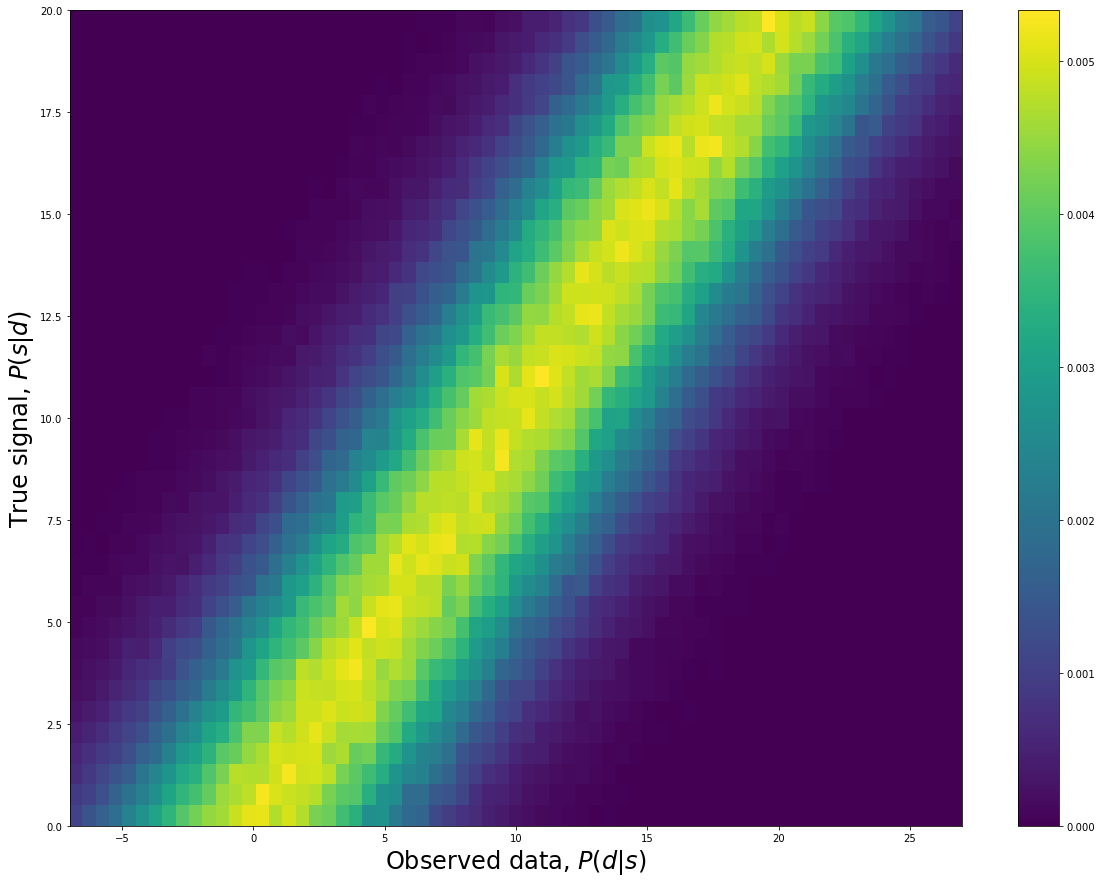

In [139]:
data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters, signalcenters, Psd.T, shading = 'auto')
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.colorbar()

### Problem 1b
Select a true injected signal and plot  𝑃(𝑑|𝑠) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it. [Hint: this was also shown in class.]

In [140]:
value = 5

In [141]:
idx = np.where(signaledges == signaledges[(signaledges > 4.8) & (signaledges < 5.2)])

In [142]:
idx

(array([10]),)

In [143]:
signaledges[9], signaledges[10]

(4.615384615384615, 5.128205128205128)

In [144]:
sigidx = np.where((signal > signaledges[9]) & (signal< signaledges[10]))

Text(0.5, 0, 'Observed Signal')

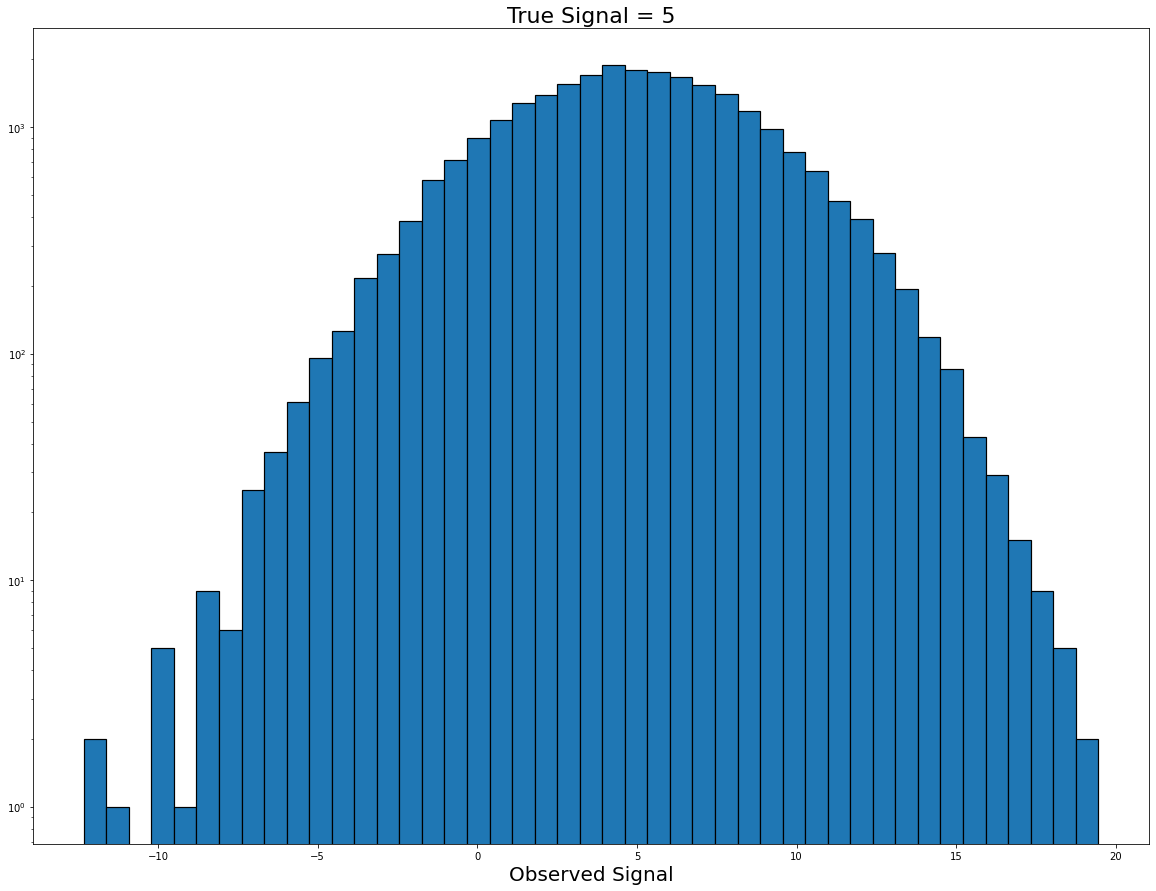

In [146]:
plt.hist(data[sigidx], bins = 45, edgecolor = 'black', linewidth = 1.2) # Note: I cant get the stair plot to work for some reason and I don't have time
plt.yscale('log')                                                       #       to troubleshoot a plot, so I hope a histogram is okay! :) 
plt.title('True Signal = 5', size = 22)
plt.xlabel('Observed Signal', size = 20)

As expected, the above distribution looks Gaussian (since we created a Gaussian background). In this case, I am plotting the signal one would observe given some true signal value. Here I chose 5 as a the true signal, so in the observations we will see a range of values following a Gaussian distribution with a mean of 5.

### Problem 1c
Select an observed data value and plot  𝑃(𝑠|𝑑) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.

In [178]:
idxdat = np.where(dataedges == dataedges[(dataedges > 4.8) & (dataedges < 5.2)])

In [179]:
idxdat

(array([24]),)

In [180]:
dataedges[23], dataedges[24]

(4.671641791044777, 5.17910447761194)

In [181]:
datidx = np.where((data > dataedges[23]) & (data < dataedges[24]))

Text(0.5, 0, 'True Signal')

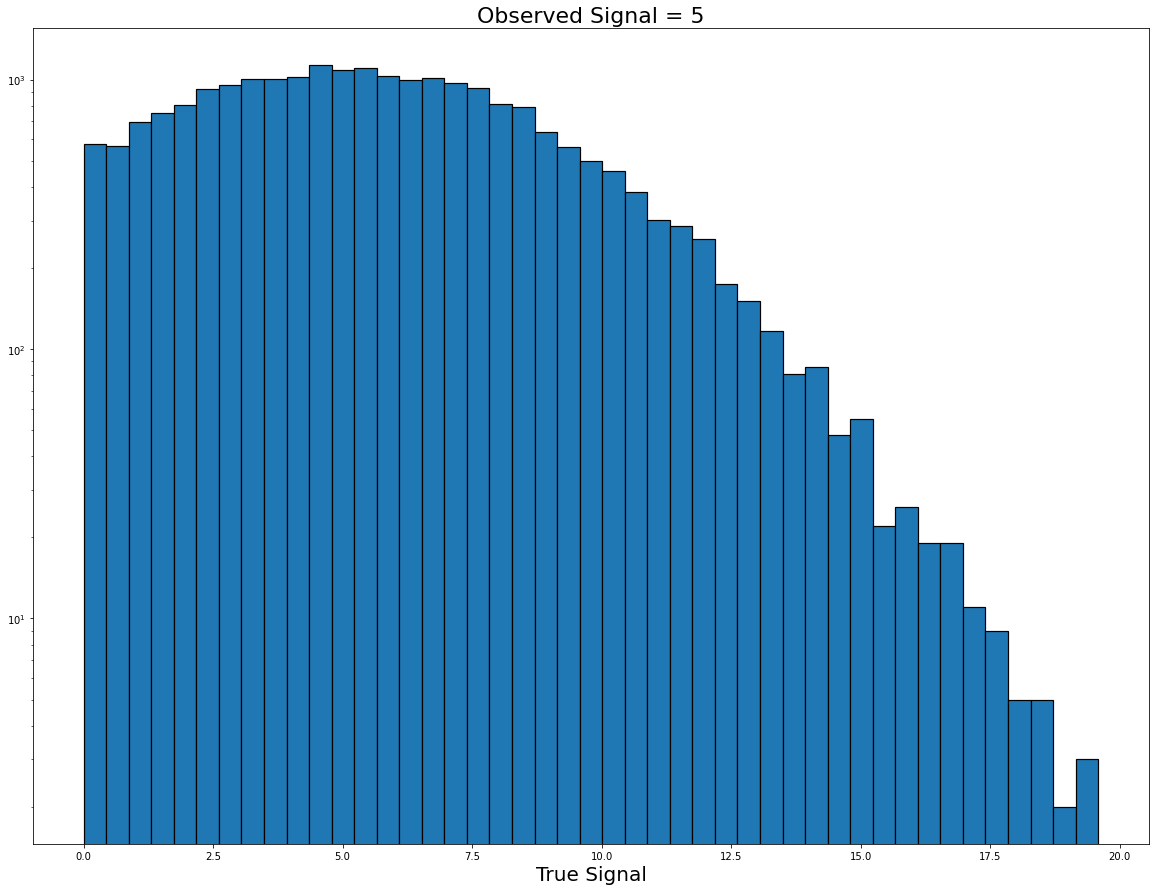

In [191]:
plt.hist(signal[datidx], bins = 45, edgecolor = 'black', linewidth = 1.2)
plt.yscale('log')
plt.title('Observed Signal = 5', size = 22)
plt.xlabel('True Signal', size = 20)

This is analogous to the previous problem, but in this case, we are plotting a histogram of the true signal given some observed value. Again, I chose 5 for the observed signal for simplicity. What this plot shows is an appoximately Gaussian distribution of true signal values given out observed value of 5 with a mean of 5. However, since we injected only positive signals (from 0 to 20), the plot is truncated at zero since non-zero signals have a zero probability. If we were to choose a higher observed signal, the plot would be a Gaussian distribution of the possible values for the true signal given some observed signal.

## Problem 2
Now repeat the above, but with a background with non-zero mean. The easiest way would be to still have Guassian distribution but with a non-zero mean. [Hint: move it by at least a couple of  𝜎 ]. Reproduce the graphs above. Lastly overplot the  𝑃(𝑑|𝑠)  and  𝑃(𝑠|𝑑)  plots. Why are they not centered on the same value? Explain carefully.

In [193]:
bkgd2 = stats.norm.rvs(loc = 4, scale = 4, size = 1000000)

In [194]:
signal = stats.uniform.rvs(0,20, 1000000)

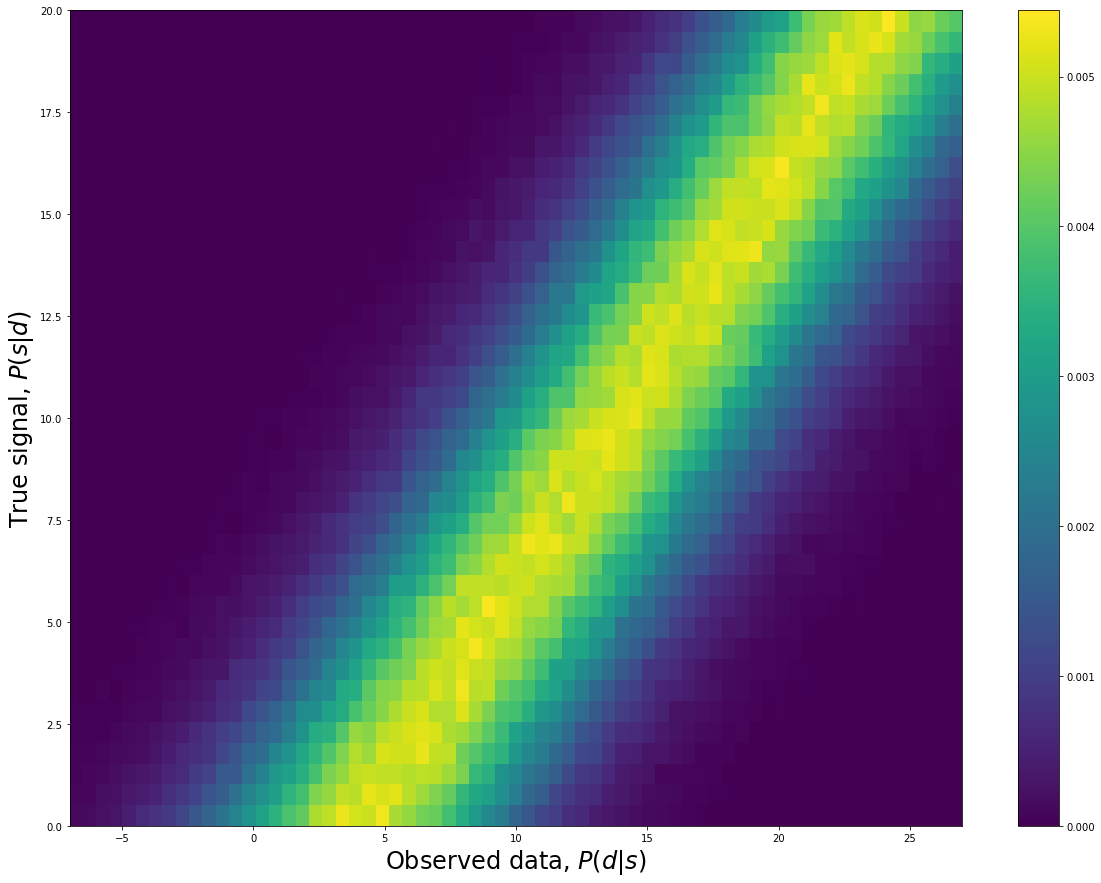

In [196]:
data2 = bkgd2 + signal

signaledges2 = np.linspace(0,20,40)
dataedges2 = np.linspace(-7,27,68)

Psd2, temp2, temp22= np.histogram2d(data2,signal, bins=[dataedges2,signaledges2], density=True)

datacenters2 = (dataedges2[:-1] + dataedges2[1:]) / 2
signalcenters2 = (signaledges2[:-1] + signaledges2[1:]) / 2
plt.pcolormesh(datacenters2, signalcenters2, Psd2.T, shading = 'auto')
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.colorbar()

In [214]:
idx2 = np.where(signaledges2 == signaledges2[(signaledges2 > 14.8) & (signaledges2 < 15.2)])

In [215]:
idx2

(array([29]),)

In [216]:
signaledges2[28], signaledges2[29]

(14.358974358974358, 14.87179487179487)

In [217]:
sigidx2 = np.where((signal > signaledges2[28]) & (signal< signaledges2[29]))

In [218]:
idxdat2 = np.where(dataedges2 == dataedges2[(dataedges2 > 14.8) & (dataedges2 < 15.2)])

In [219]:
idxdat2

(array([43]),)

In [222]:
dataedges2[42], dataedges2[43]

(14.313432835820898, 14.82089552238806)

In [223]:
datidx2 = np.where((data2 > dataedges2[42]) & (data2 < dataedges2[43]))

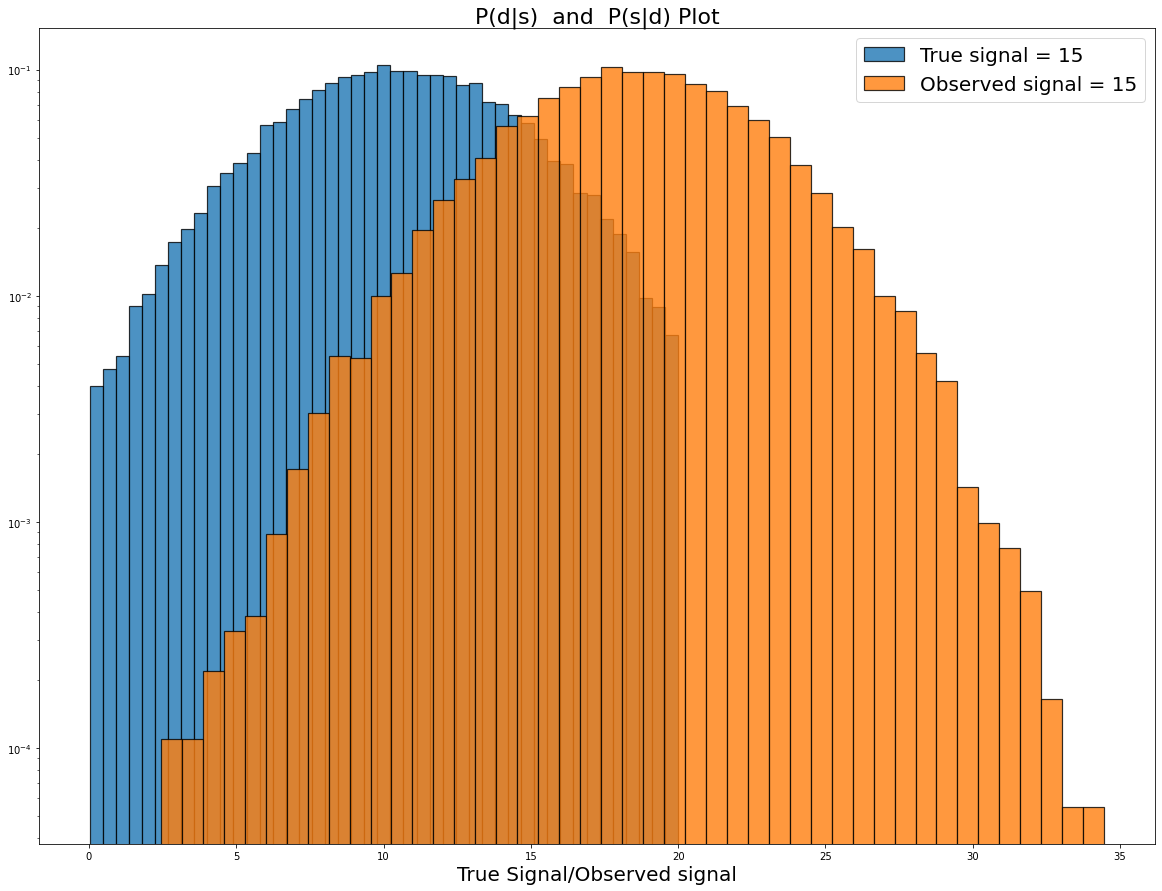

In [231]:
plt.hist(signal[datidx2], bins = 45, edgecolor = 'black', linewidth = 1.2, alpha = 0.8, label = 'True signal = 15', density = True)
plt.hist(data2[sigidx2], bins = 45, edgecolor = 'black', linewidth = 1.2, alpha = 0.8, label = 'Observed signal = 15', density = True)
plt.yscale('log')
plt.title('P(d|s)  and  P(s|d) Plot', size = 22)
plt.xlabel('True Signal/Observed signal', size = 20)
plt.legend(prop = {'size':20})

By making the background a non-zero mean Gaussian, we are effectively shifting the 𝑃(𝑠|𝑑) vs 𝑃(𝑑|𝑠) plot to the right by the mean of the background Gaussian. The reason the means of the two histograms shown above do not match stems diretly from this fact. For example, just reaing off the approximate mean on the 𝑃(𝑠|𝑑) vs 𝑃(𝑑|𝑠) plot for a true signal of 10, our observed signal will be a Gaussian distribution with a mean of approximately 14. Note: the blue histogram is truncated because we only injected true signal from 0 to 20.